# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import plotly.express as px
import datetime as dt

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
if os.path.isfile("tmp_table_25148_1595913165.xls"):
    filepath = "tmp_table_25148_1595913165.xls"
    print("loading from file")
else:
    filepath = "https://www.dpie.nsw.gov.au/air-quality/air-quality-data-services/data-download-facility"
    print("loading from the internet")

air_data = pd.read_excel(filepath)
print("done")

loading from file
done


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [46]:
air_datecorrected = pd.read_excel('tmp_table_25148_1595913165.xls',parse_dates=True,index_col='Date',dayfirst=True)
air_datecorrected.head()

,Sydney central-east RAQI 24 hour [index],Sydney north-west RAQI 24 hour [index],Sydney south-west RAQI 24 hour [index],Illawarra RAQI 24 hour [index],Lower Hunter RAQI 24 hour [index],Central tablelands RAQI 24 hour [index],South-west slopes RAQI 24 hour [index],North-west slopes RAQI 24 hour [index],Upper Hunter - Muswellbrook RAQI 24 hour [index],Upper Hunter - Singleton RAQI 24 hour [index],...,Upper Hunter - Merriwa RAQI 24 hour [index],Central Coast RAQI 24 hour [index],Newcastle local RAQI 24 hour [index],Northern Tablelands RAQI 24 hour [index],Research Monitoring RAQI 24 hour [index],Roadsite Monitoring RAQI 24 hour [index],Southern Tablelands RAQI 24 hour [index],Emergency Monitoring - Lismore RAQI 24 hour [index],Port Kembla Steelworks RAQI 24 hour [index],Mid-North Coast RAQI 24 hour [index]
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,80,83,95,89,91,66,108.0,71,51,50,...,42.0,85.0,84,24,NaN,49.0,NaN,NaN,NaN,NaN
2019-01-02,67,97,95,72,260,68,123.0,73,69,60,...,65.0,57.0,199,19,NaN,45.0,NaN,NaN,NaN,NaN
2019-01-03,53,74,64,60,71,32,95.0,69,72,52,...,81.0,44.0,123,19,NaN,40.0,NaN,NaN,NaN,NaN
2019-01-04,67,100,120,71,76,48,95.0,58,72,46,...,49.0,47.0,182,17,NaN,54.0,NaN,NaN,NaN,NaN
2019-01-05,85,83,113,148,97,72,164.0,53,61,60,...,47.0,59.0,218,10,NaN,60.0,NaN,NaN,NaN,NaN


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [9]:
if os.path.isfile("covid-19-cases-by-notification-date-location-and-likely-source-of-infection.csv"):
    filepath = "covid-19-cases-by-notification-date-location-and-likely-source-of-infection.csv"
    print("loading from file")
else:
    filepath = "https://www.kaggle.com/ryanskene/see19-a-comprehensive-global-covid19-dataset"
    print("loading from the internet")

covid = pd.read_csv(filepath)
print("done")

loading from file
done


In [71]:
covid_data = pd.read_csv('covid-19-cases-by-notification-date-location-and-likely-source-of-infection.csv',parse_dates=True,index_col='notification_date',dayfirst=True)

,postcode,likely_source_of_infection,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
notification_date,,,,,,
2020-01-25,2134.0,Overseas,X700,Sydney,11300.0,Burwood (A)
2020-01-25,2121.0,Overseas,X760,Northern Sydney,16260.0,Parramatta (C)
2020-01-25,2071.0,Overseas,X760,Northern Sydney,14500.0,Ku-ring-gai (A)
2020-01-27,2033.0,Overseas,X720,South Eastern Sydney,16550.0,Randwick (C)
2020-03-01,2163.0,Overseas,X710,South Western Sydney,12850.0,Fairfield (C)
...,...,...,...,...,...,...
2020-07-13,2170.0,Locally acquired - contact of a confirmed case...,X710,South Western Sydney,14900.0,Liverpool (C)
2020-07-13,2290.0,Locally acquired - contact of a confirmed case...,X800,Hunter New England,14650.0,Lake Macquarie (C)
2020-07-13,NaN,Overseas,NaN,NaN,NaN,NaN


In [72]:
covid_date = covid_data.drop(['postcode', 'lhd_2010_name', 'likely_source_of_infection', 'lhd_2010_code', 'lga_code19', 'lga_name19'], axis=1)
covid_date

""
notification_date
2020-01-25
2020-01-25
2020-01-25
2020-01-27
2020-03-01
...
2020-07-13
2020-07-13
2020-07-13


In [92]:
covid['notification_date'].value_counts()

2020-03-27    213
2020-03-25    206
2020-03-24    191
2020-03-26    185
2020-03-23    176
             ... 
2020-05-03      1
2020-06-02      1
2020-04-26      1
2020-06-06      1
2020-05-17      1
Name: notification_date, Length: 129, dtype: int64

Text(0, 0.5, 'Air-quality index')

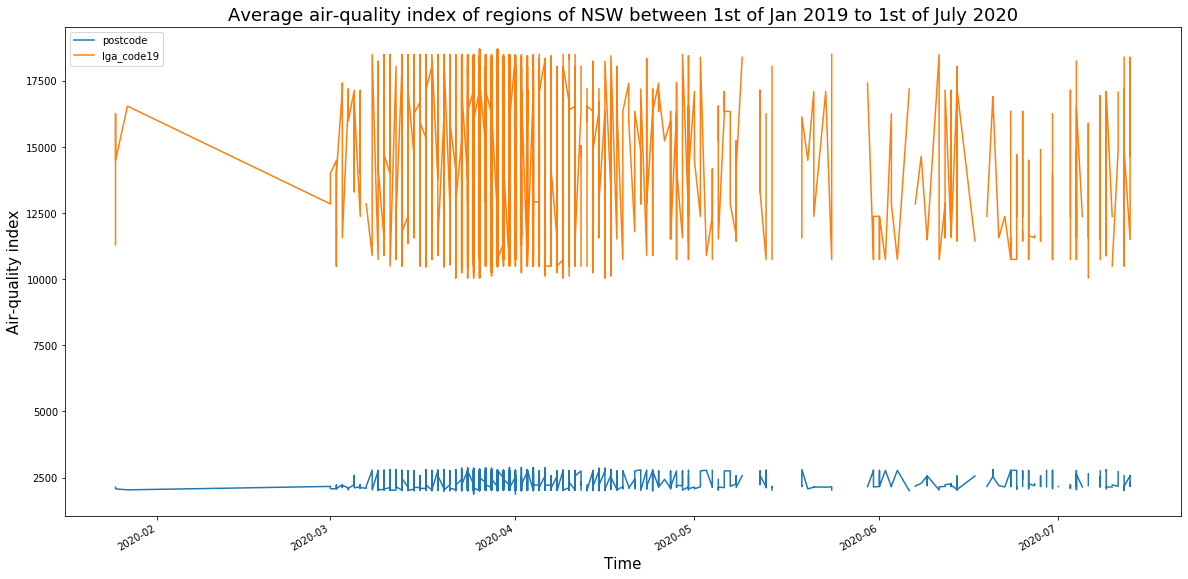

In [95]:
covid_data.plot()
plt.title("Average air-quality index of regions of NSW between {} to {}".format("1st of Jan 2019", "1st of July 2020"), fontsize=18)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Air-quality index', fontsize=15)

In [10]:
covid.columns

Index(['notification_date', 'postcode', 'likely_source_of_infection',
       'lhd_2010_code', 'lhd_2010_name', 'lga_code19', 'lga_name19'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

In [11]:
row_one = covid.iloc[1]
row_one

notification_date                  2020-01-25
postcode                                 2121
likely_source_of_infection           Overseas
lhd_2010_code                            X760
lhd_2010_name                 Northern Sydney
lga_code19                              16260
lga_name19                     Parramatta (C)
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [14]:
covid_loc = covid['lhd_2010_name'].value_counts()
covid_loc

South Eastern Sydney     686
Northern Sydney          548
Western Sydney           345
South Western Sydney     284
Hunter New England       281
Sydney                   277
Nepean Blue Mountains    190
Central Coast            123
Illawarra Shoalhaven     121
Southern NSW              56
Northern NSW              55
Mid North Coast           52
Western NSW               46
Murrumbidgee              39
Network with Vic          11
Far West                   2
Name: lhd_2010_name, dtype: int64

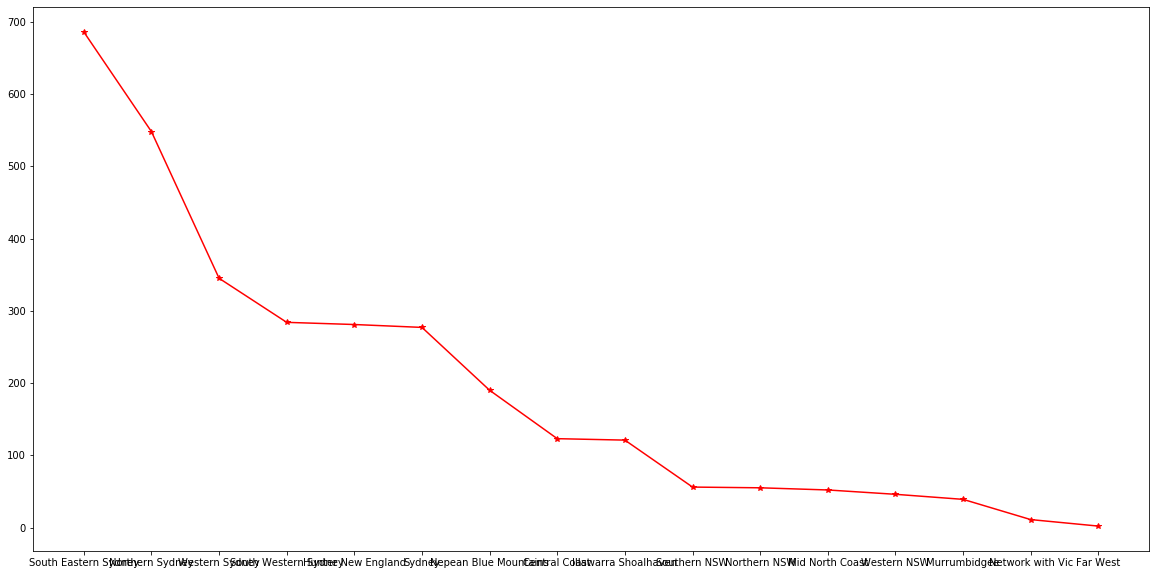

In [33]:
plt.plot(covid_loc, marker='*', color='r')

In [47]:
air_datecorrected["Sydney central-east RAQI 24 hour [index]"]

Date
2019-01-01     80
2019-01-02     67
2019-01-03     53
2019-01-04     67
2019-01-05     85
             ... 
2020-07-09     97
2020-07-10    132
2020-07-11     81
2020-07-12     97
2020-07-13     44
Name: Sydney central-east RAQI 24 hour [index], Length: 560, dtype: int64

In [17]:
nsw = gpd.read_file("nswmap.json")
nsw.sample(10)

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,nsw_locali,nsw_loca_1,nsw_loca_2,nsw_loca_3,nsw_loca_4,nsw_loca_5,nsw_loca_6,nsw_loca_7,geometry
3639,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.3595,17741,2012-08-15,None,NSW104,2012-10-30,None,ATHOLWOOD,None,None,G,None,1,"POLYGON ((151.09528 -28.98114, 151.08146 -28.9..."
355,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.334,25071,2015-09-03,None,NSW1908,2015-11-10,None,HELENSBURGH,None,None,G,None,1,"POLYGON ((150.99667 -34.19180, 150.99013 -34.1..."
671,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.624,19246,2012-11-21,None,NSW2775,2013-01-23,None,MOUNT DARRAGH,None,None,G,None,1,"POLYGON ((149.54218 -36.81595, 149.54254 -36.8..."
1693,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.1656,27027,2016-12-12,None,NSW130,2017-02-02,None,BADGERYS CREEK,None,None,G,None,1,"POLYGON ((150.76747 -33.85245, 150.77106 -33.8..."
4222,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.4252,26043,2016-06-07,None,NSW1924,2016-08-08,None,HILLDALE,None,None,G,None,1,"POLYGON ((151.63215 -32.45606, 151.63323 -32.4..."
1507,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.1479,18885,2012-11-21,None,NSW4254,2013-01-23,None,WELAREGANG,None,None,G,None,1,"POLYGON ((147.89997 -35.99311, 147.90308 -35.9..."
3645,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.3606,12341,2010-06-07,None,NSW1229,2012-02-04,None,DARUKA,None,None,G,None,1,"POLYGON ((150.99694 -31.01692, 150.99377 -31.0..."
504,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.449,24924,2015-09-03,None,NSW3544,2015-11-10,None,SEAL ROCKS,None,None,G,None,1,"POLYGON ((152.51947 -32.39653, 152.51651 -32.4..."
496,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.442,24683,2015-09-03,None,NSW1854,2015-11-10,None,HAMILTON,None,None,G,None,1,"POLYGON ((151.75318 -32.92171, 151.75246 -32.9..."
2542,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.3802,22550,2014-05-22,None,NSW1416,2014-08-02,None,ELLANGOWAN,None,None,G,None,1,"POLYGON ((153.17191 -28.97077, 153.16965 -28.9..."


In [48]:
average_air = pd.DataFrame(air_datecorrected.mean(axis = 1))
average_air

,0
Date,
2019-01-01,62.840000
2019-01-02,82.560000
2019-01-03,68.423077
2019-01-04,70.653846
2019-01-05,79.115385
...,...
2020-07-09,46.851852
2020-07-10,56.444444
2020-07-11,44.535714


In [1]:
average_air.plot()
plt.title("Average air-quality index of regions of NSW between {} to {}".format("1st of Jan 2019", "1st of July 2020"), fontsize=18)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Air-quality index', fontsize=15)

NameError: name 'average_air' is not defined

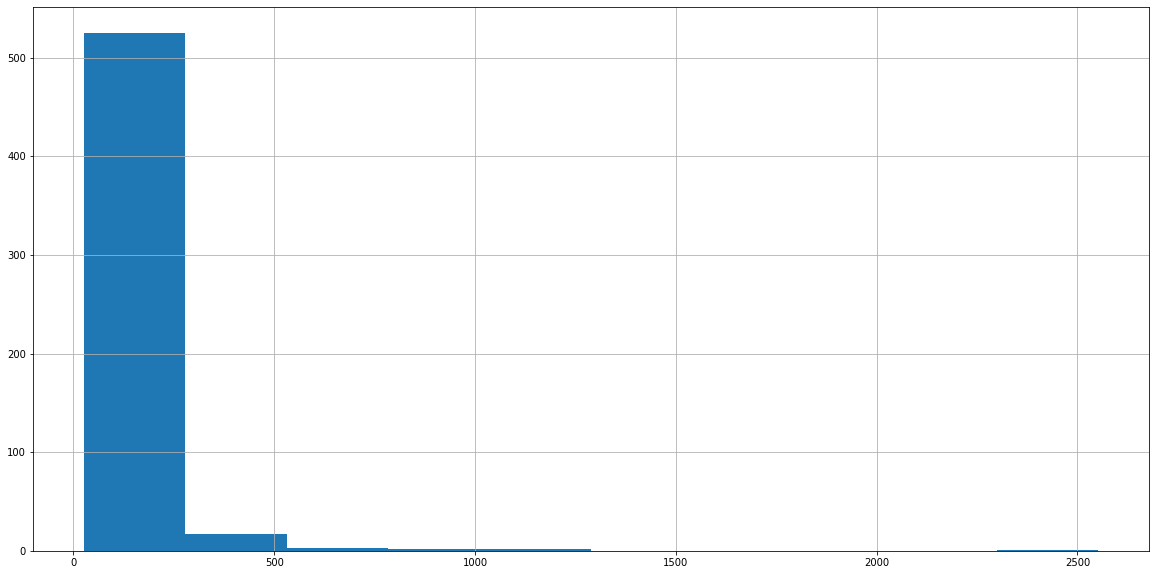

In [40]:
air_data["Sydney central-east RAQI 24 hour [index]"].hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

In [100]:
plt.scatter(average_air, covid_date, color='r')

ValueError: x and y must be the same size

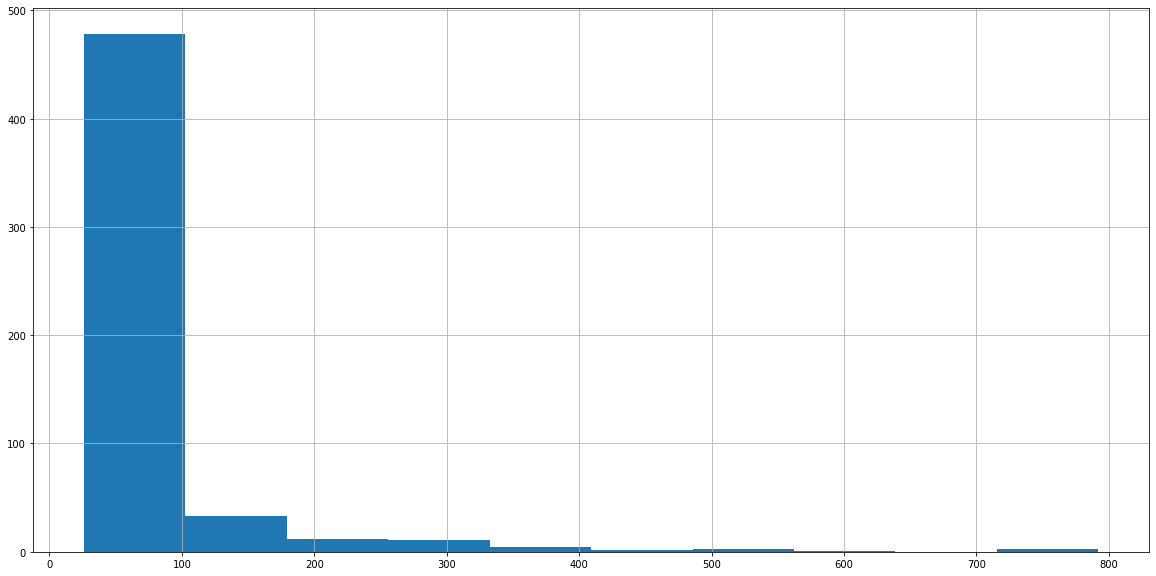

In [10]:
air_data["Sydney central-east RAQI 24 hour [index]"][air_data["Sydney central-east RAQI 24 hour [index]"] < 1000].hist()

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

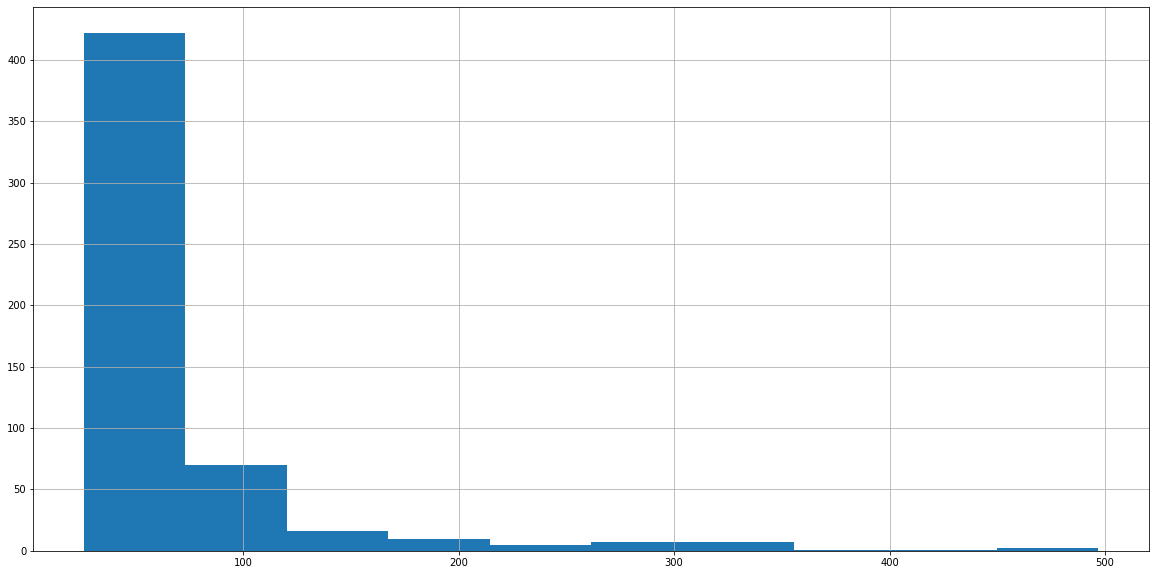

In [15]:
air_data["Sydney central-east RAQI 24 hour [index]"][air_data["Sydney central-east RAQI 24 hour [index]"] < 500].hist()

Let's see what's under $1000

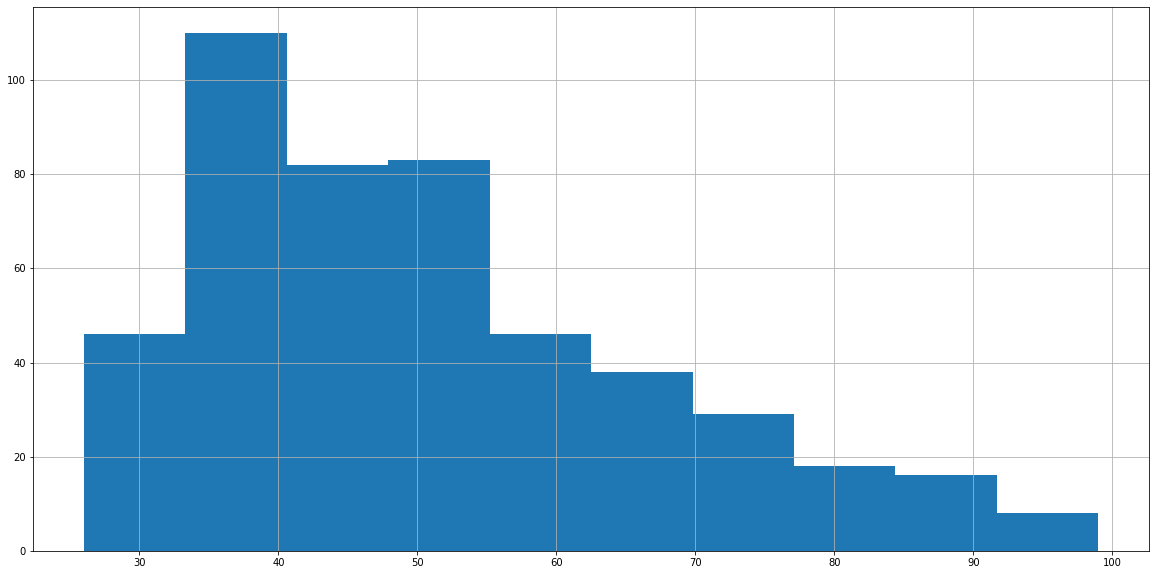

In [26]:
air_data["Sydney central-east RAQI 24 hour [index]"][air_data["Sydney central-east RAQI 24 hour [index]"] < 100].hist()

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [16]:
air_data["Sydney central-east RAQI 24 hour [index]"].value_counts()

38.0     25
37.0     19
36.0     18
33.0     17
41.0     16
         ..
160.0     1
108.0     1
176.0     1
123.0     1
518.0     1
Name: Sydney central-east RAQI 24 hour [index], Length: 135, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

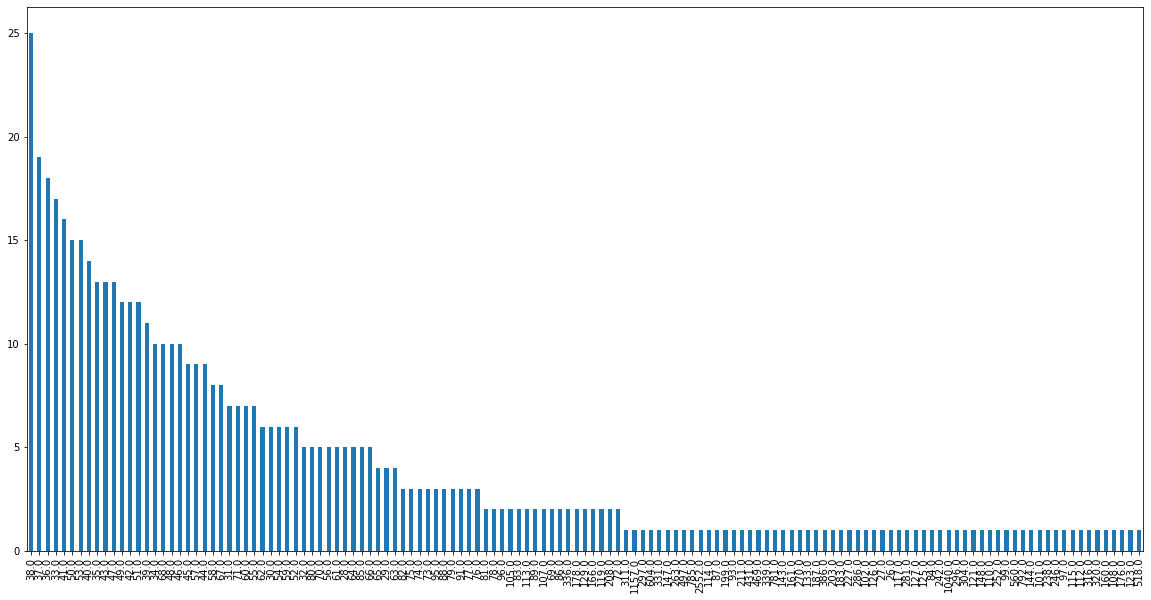

In [33]:
air_data["Sydney central-east RAQI 24 hour [index]"].value_counts().plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 
![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
[img](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

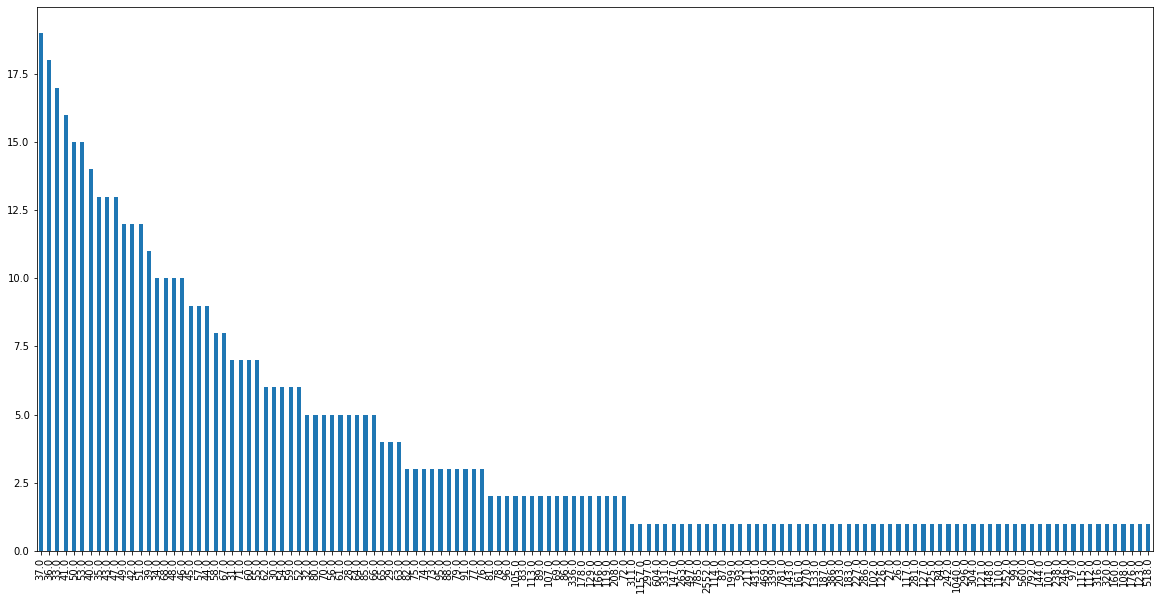

In [25]:
pdvc = air_data["Sydney central-east RAQI 24 hour [index]"].value_counts()
pdvc[pdvc < 20].plot(kind="bar")

This pattern keeps repeating itself:

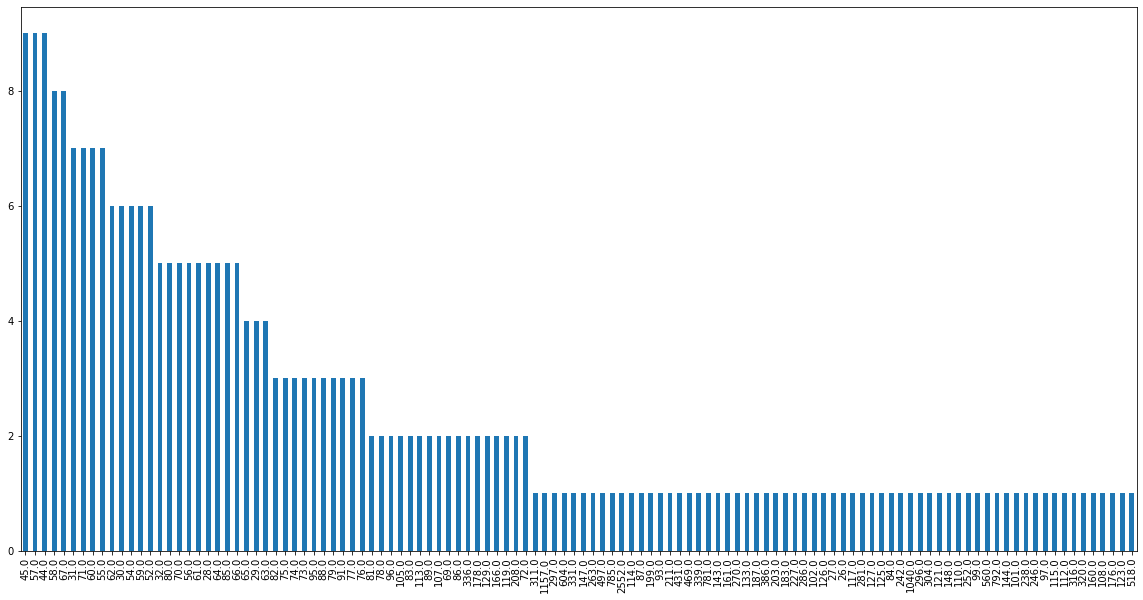

In [24]:
pdvc[pdvc < 10].plot(kind="bar")

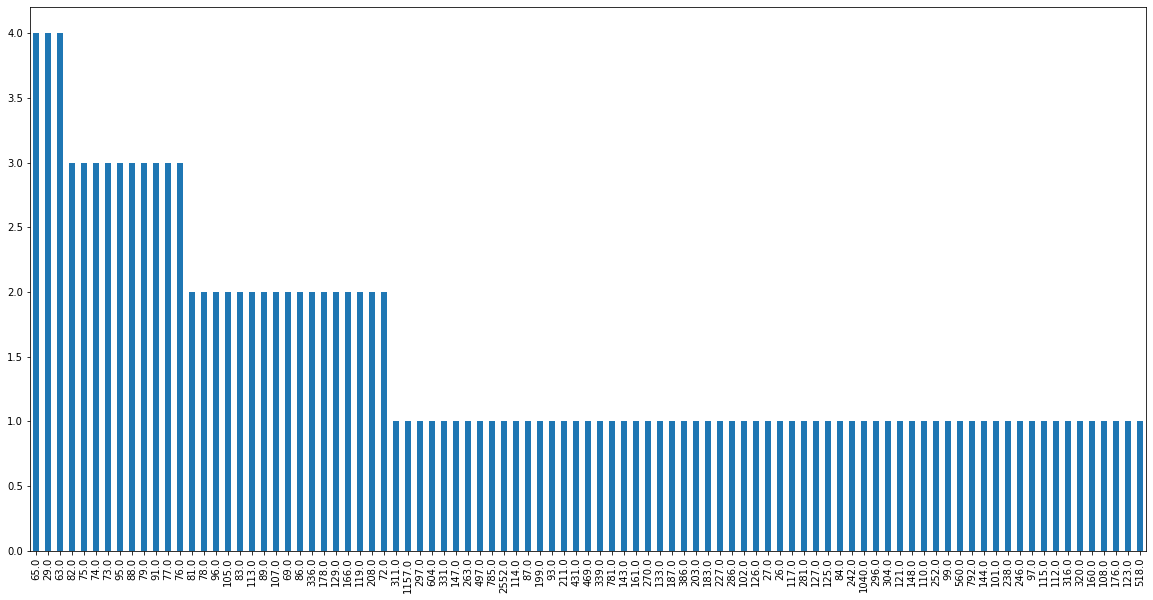

In [26]:
pdvc[pdvc < 5].plot(kind="bar")

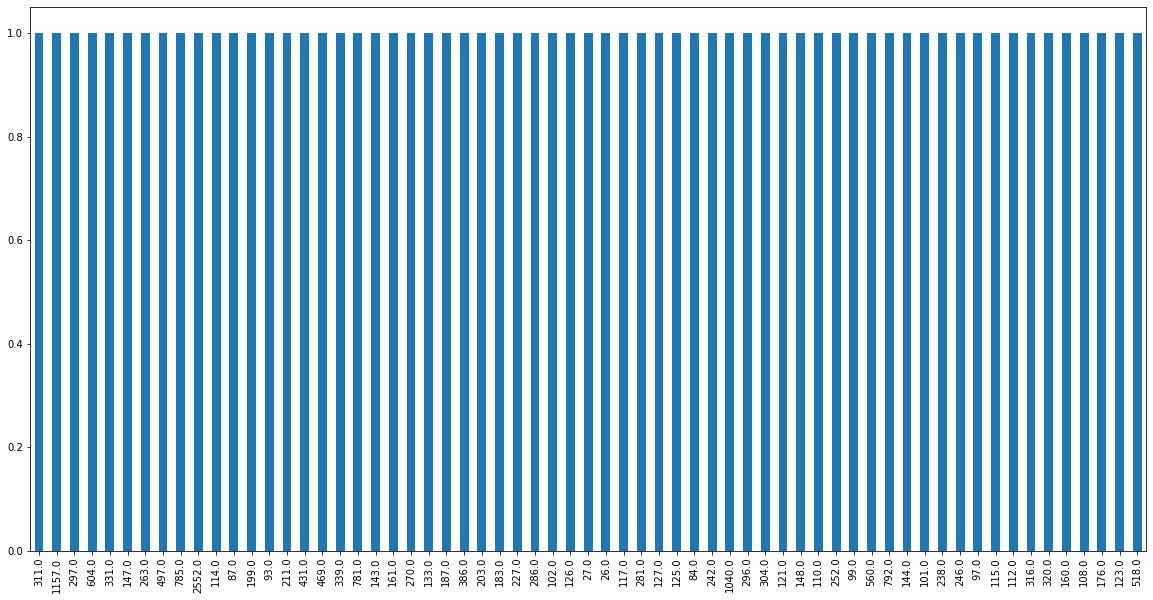

In [27]:
pdvc[pdvc < 2air_data["Sydney central-east RAQI 24 hour [index]"][air_data["Sydney central-east RAQI 24 hour [index]"] < 1000]].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [44]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

C:\Users\ben\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


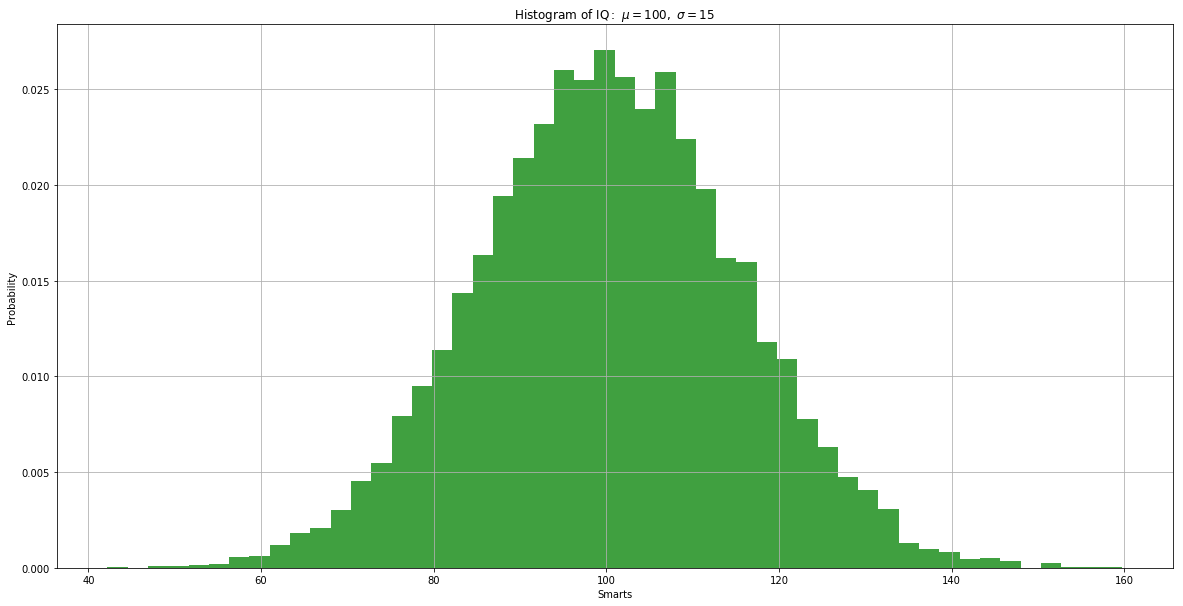

In [46]:
# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

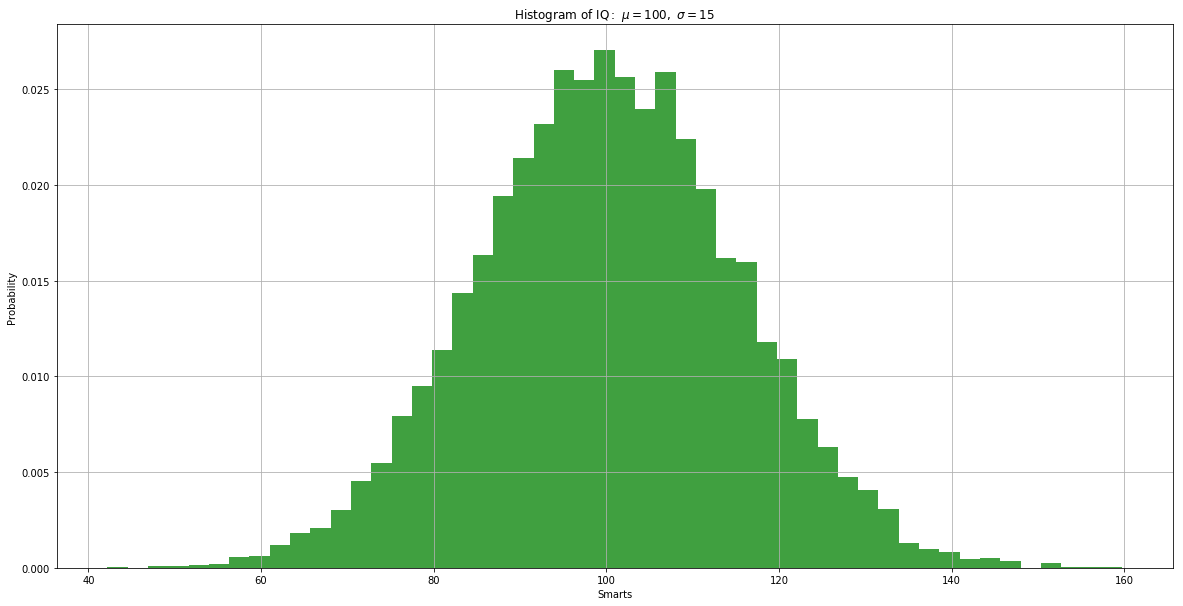

In [45]:
# the histogram of the data
plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

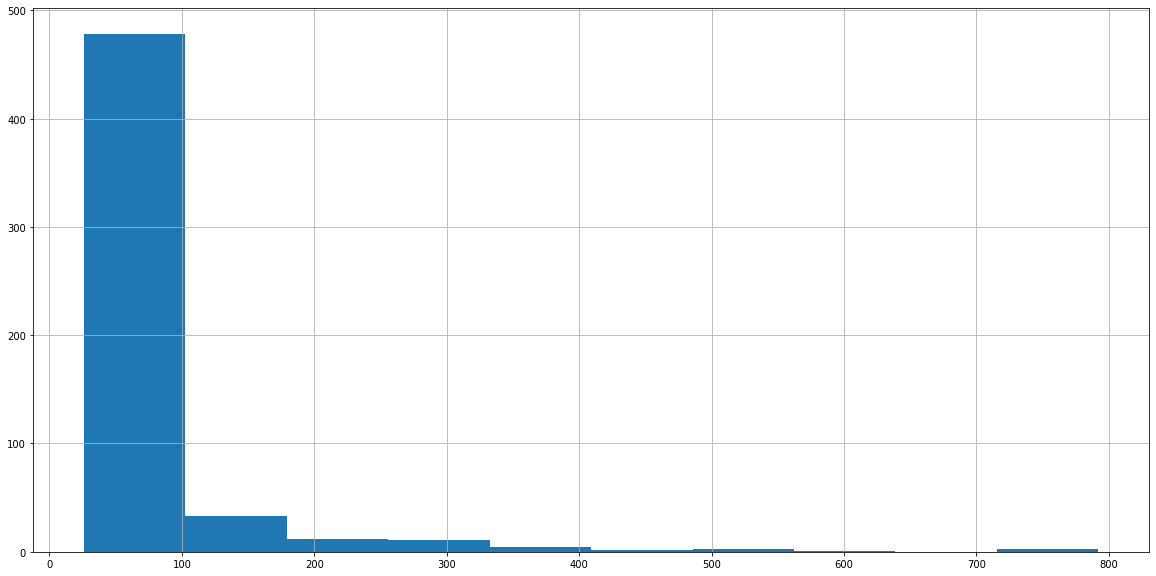

In [28]:
air_data["Sydney central-east RAQI 24 hour [index]"][air_data["Sydney central-east RAQI 24 hour [index]"] < 1000].hist()

And this is how we'd change it so that we can add more features:

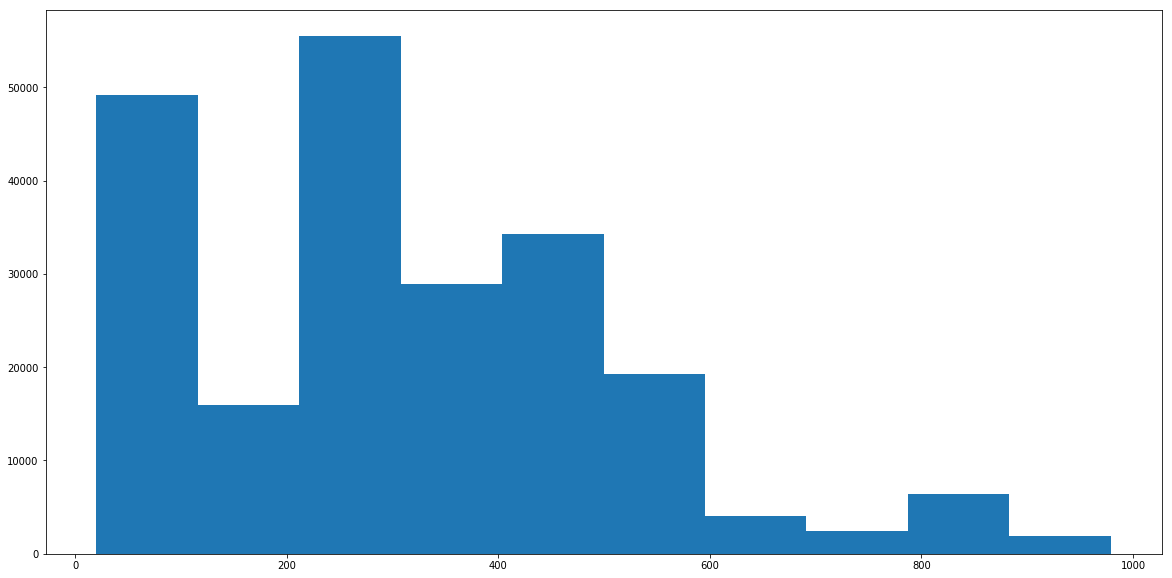

In [31]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

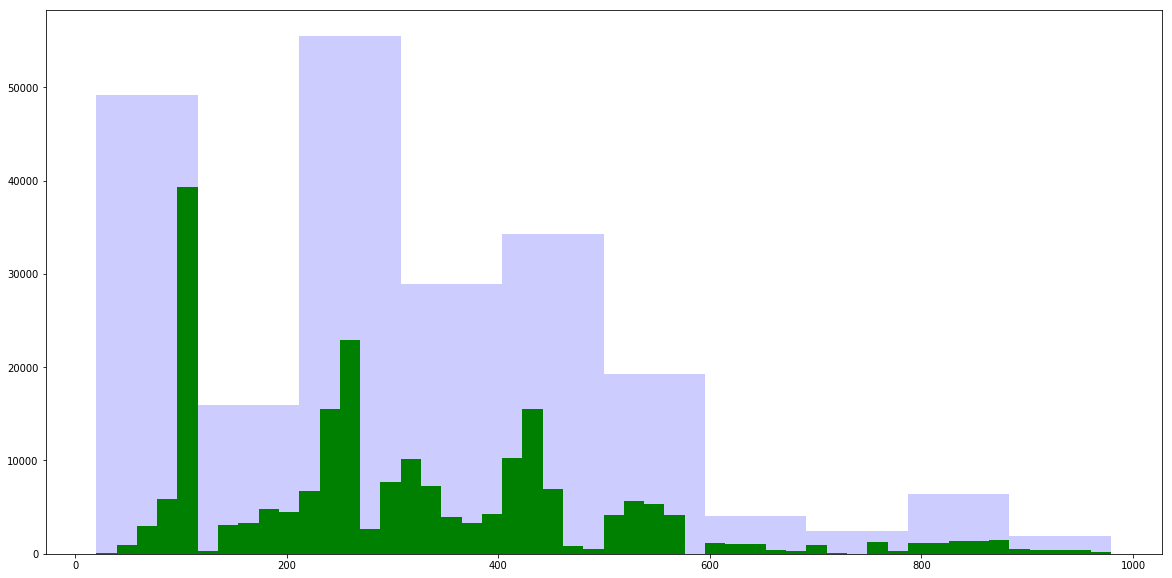

In [32]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

We can go back to our initial, unfiltered, data:

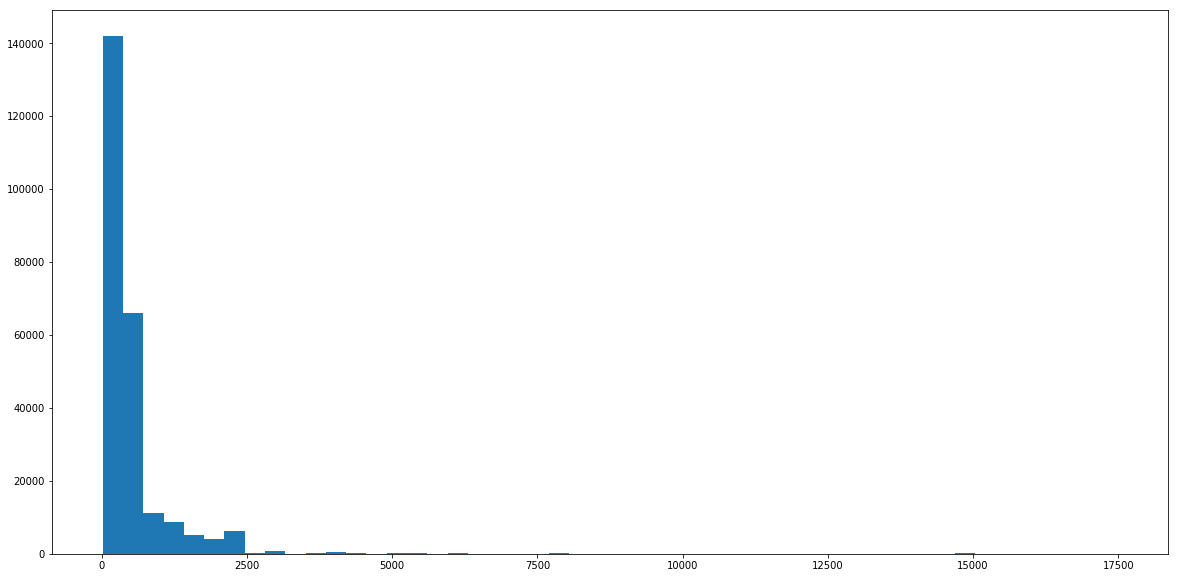

In [33]:
plt.hist(penalty_data["FACE_VALUE"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

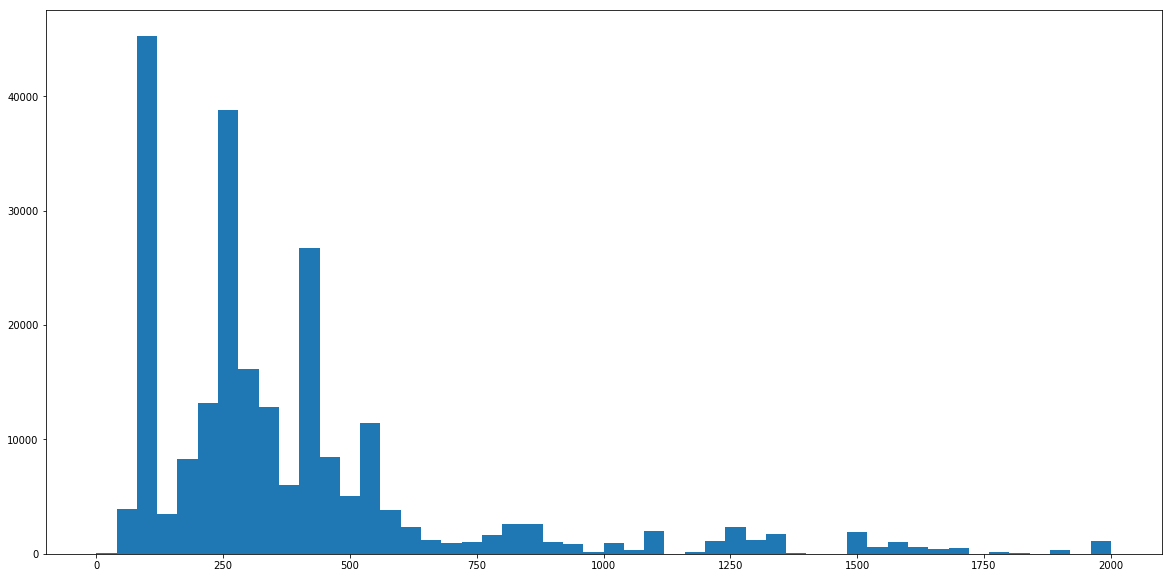

In [34]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

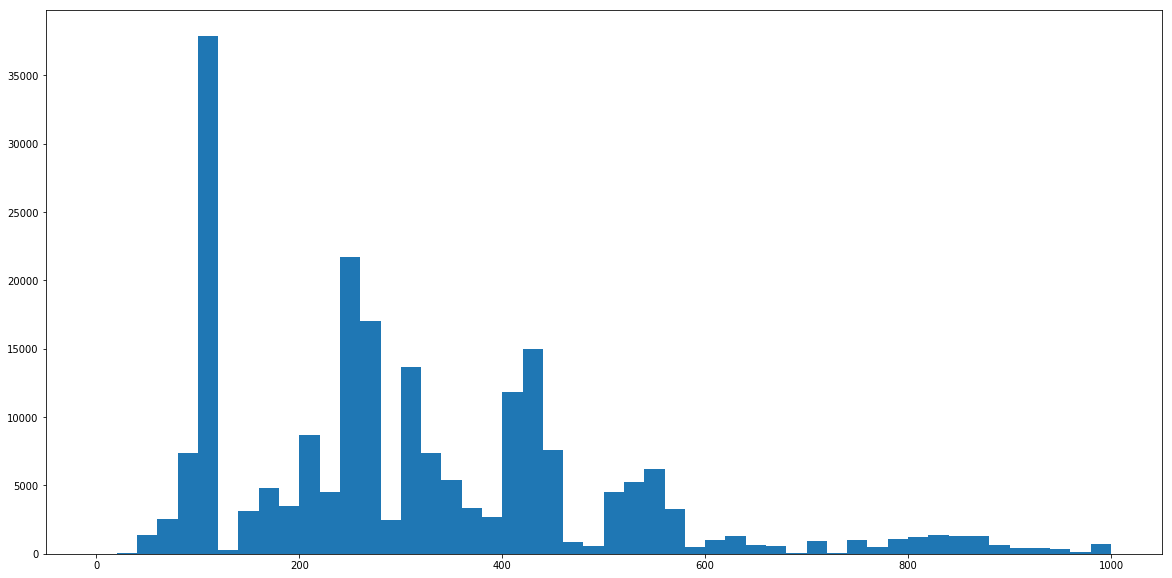

In [35]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

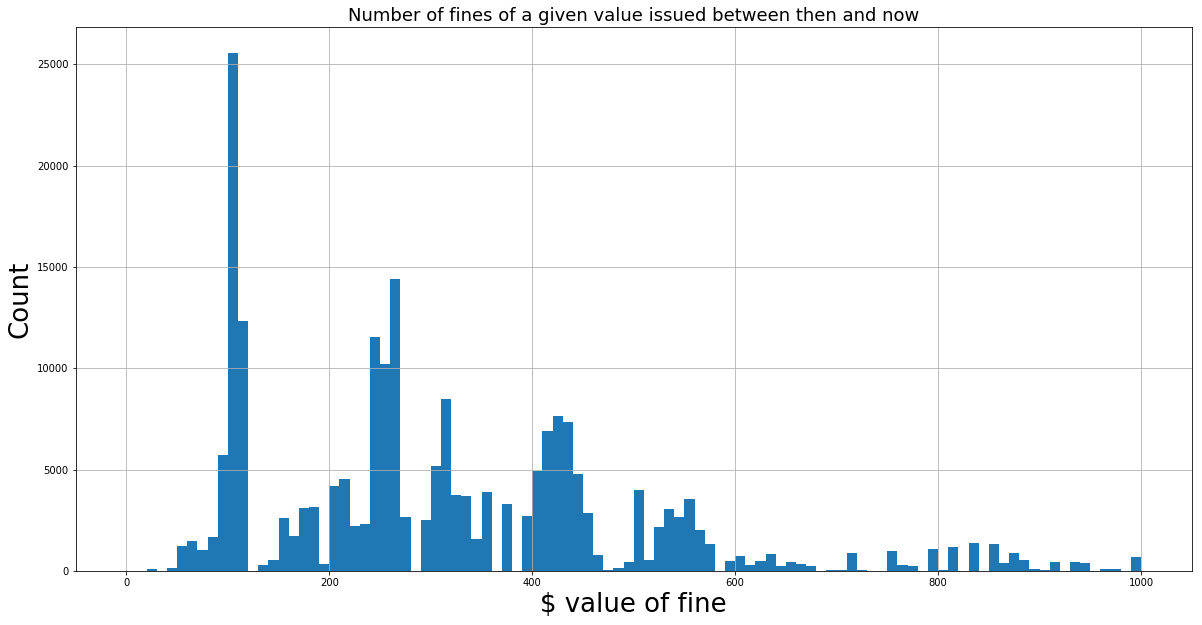

In [36]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued between {} and {}".format("then", "now"), fontsize=18)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [37]:
penalty_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
penalty_data.head(2)

,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670


This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

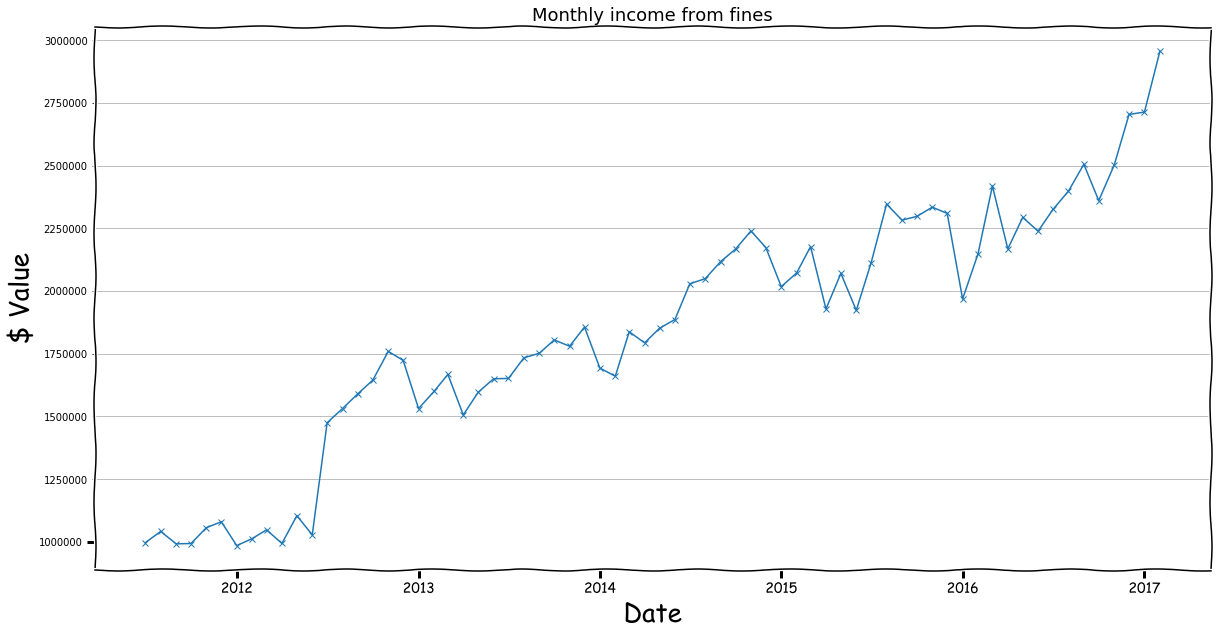

In [48]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

In [39]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [40]:
ss = penalty_data.loc[:5]

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [41]:
ss["day"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(1)

C:\Users\ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1


Above is equivalent to below, it's up to you to decide what is more readable.

In [42]:
def my_f(x):
    return x.day

ss["day"] = ss.apply(my_f, axis=1)
ss.head(1)

C:\Users\ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1


How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [47]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


# _fin_